In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import c3aidatalake
from preparedata import get_simulation_data

In [2]:
r_confirmed_cases, r_confirmed_deaths, r_confirmed_recoveries, r_infection_rate, r_mortality_rate, \
        r_recovery_rate, r_county_pop, r_prob_visiting_grocery_store, r_prob_visiting_restaurant, r_prob_visiting_park \
= get_simulation_data('Kern_California_UnitedStates','2020-05-01','2020-08-29')

In [22]:
df = pd.DataFrame()
df['dates'] = pd.date_range(start="2020-05-01",end="2020-08-28")
df['confirmed_cases'] = r_confirmed_cases
df['confirmed_deaths'] = r_confirmed_deaths
df['confirmed_recoveries'] = r_confirmed_recoveries
df['infection_rate'] = r_infection_rate
df['mortality_rate'] = r_mortality_rate
df['recovery_rate'] = r_recovery_rate
df['prob_visiting_grocery_store'] = r_prob_visiting_grocery_store
df['prob_visiting_restaurant'] = r_prob_visiting_restaurant
df['prob_visiting_park'] = r_prob_visiting_park

In [24]:
df.head(10)

,dates,confirmed_cases,confirmed_deaths,confirmed_recoveries,infection_rate,mortality_rate,recovery_rate,prob_visiting_grocery_store,prob_visiting_restaurant,prob_visiting_park
0,2020-05-01,939,8,543,0.0010,0.0085,0.5783,0.095445,0.352444,0.092064
1,2020-05-02,969,8,579,0.0011,0.0083,0.5975,0.099225,0.347261,0.08631
2,2020-05-03,1005,8,587,0.0011,0.0080,0.5841,0.095445,0.347261,0.099462
3,2020-05-04,1016,8,592,0.0011,0.0079,0.5827,0.09639,0.383542,0.096174
4,2020-05-05,1045,11,620,0.0012,0.0105,0.5933,0.099225,0.378359,0.092886
5,2020-05-06,1073,11,643,0.0012,0.0103,0.5993,0.0945,0.367993,0.091242
6,2020-05-07,1133,13,674,0.0013,0.0115,0.5949,0.09828,0.367993,0.089598
7,2020-05-08,1166,15,705,0.0013,0.0129,0.6046,0.09639,0.342078,0.096996
8,2020-05-09,1228,15,740,0.0014,0.0122,0.6026,0.108675,0.352444,0.08631
9,2020-05-10,1254,15,753,0.0014,0.0120,0.6005,0.10962,0.336895,0.09453


In [25]:
susceptible = [int(0.07*r_county_pop)]*120
activeCases = np.subtract(np.subtract(r_confirmed_cases,r_confirmed_recoveries),r_confirmed_deaths)
Susceptibles = np.subtract(np.subtract(np.subtract(susceptible, activeCases), r_confirmed_recoveries),r_confirmed_deaths)
date_range = len(r_confirmed_cases)


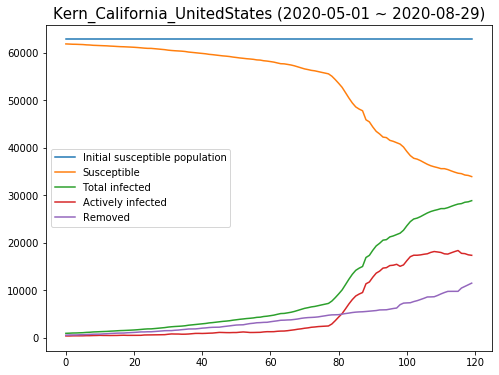

In [26]:
plt.figure(figsize=(8,6))
plt.plot(range(date_range),susceptible, label ='Initial susceptible population')
plt.plot(range(date_range),Susceptibles, label = 'Susceptible')
plt.plot(range(date_range),r_confirmed_cases, label = 'Total infected')
plt.plot(range(date_range),activeCases, label = 'Actively infected')
plt.plot(range(date_range),np.add(r_confirmed_recoveries,r_confirmed_deaths), label = 'Removed')
plt.legend()
plt.title('Kern_California_UnitedStates (2020-05-01 ~ 2020-08-29)', fontsize=15)
plt.show()
#plt.savefig('Kern_0501_0829')